In [9]:
import os
from os import path
import glob
import pandas as pd

LOCATE_PY_DIRECTORY_PATH = os.getcwd()
LOCATE_PY_PARENT_DIR = os.path.abspath(os.path.join(LOCATE_PY_DIRECTORY_PATH, ".."))
print(LOCATE_PY_PARENT_DIR)
d = pd.read_csv(os.path.join(LOCATE_PY_PARENT_DIR, 'DATA\\DATA_remove_thoisu.csv'), sep=',', encoding='utf-8')

label = d['labels']
text = d['texts']




d:\NEWS_CLASSIFICATION


In [10]:
i = {}
count = 0

for d in label:
    if d in i:
        i[d] += 1;
    else: 
        i[d] = 1
print (i)


{'Chính trị': 2780, 'Doanh nghiệp': 3905, 'Kinh doanh': 2108, 'Bất động sản': 3020, 'Chứng khoán': 2511, 'Khoa học': 4920, 'Giải trí': 8459, 'Dân sinh': 2355, 'Giao thông': 2560, 'Pháp luật': 2941, 'Giáo dục': 2855, 'Sức khỏe': 2842, 'Thị trường': 2404, 'Thể thao': 2606}


In [11]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

test_percent = 0.2

X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=test_percent, random_state=42)
 
# encode label
label_encoder = LabelEncoder()
label_encoder.fit(label)
sum_label =list(label_encoder.classes_)
# for i in label:
#   sum_label
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
print(sum_label)

['Bất động sản', 'Chính trị', 'Chứng khoán', 'Doanh nghiệp', 'Dân sinh', 'Giao thông', 'Giáo dục', 'Giải trí', 'Khoa học', 'Kinh doanh', 'Pháp luật', 'Sức khỏe', 'Thể thao', 'Thị trường']


In [12]:

import pickle
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import numpy as np

start_time = time.time()
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                             max_df=0.8,
                                             max_features=None)), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())
                    ])
text_clf = text_clf.fit(X_train, y_train)
 
train_time = time.time() - start_time
print('Done training Naive Bayes in', train_time, 'seconds.')
 

y_pred = text_clf.predict(X_test)
print('Naive Bayes, Accuracy =', np.mean(y_pred == y_test))

Done training Naive Bayes in 15.50249695777893 seconds.
Naive Bayes, Accuracy = 0.8952885238815648


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=sum_label))


              precision    recall  f1-score   support

Bất động sản       0.96      0.91      0.94       612
   Chính trị       0.99      0.95      0.97       554
 Chứng khoán       0.91      0.81      0.86       517
Doanh nghiệp       0.65      0.92      0.76       740
    Dân sinh       1.00      0.86      0.93       503
  Giao thông       0.97      0.93      0.95       504
    Giáo dục       1.00      0.85      0.92       592
    Giải trí       0.77      1.00      0.87      1659
    Khoa học       0.98      0.93      0.96       975
  Kinh doanh       0.98      0.68      0.80       403
   Pháp luật       1.00      0.95      0.97       603
    Sức khỏe       1.00      0.64      0.78       569
    Thể thao       1.00      0.98      0.99       530
  Thị trường       1.00      0.82      0.90       493

    accuracy                           0.90      9254
   macro avg       0.94      0.87      0.90      9254
weighted avg       0.92      0.90      0.90      9254



In [14]:

import numpy as np

def c_m(y_test, y_pred):
  N = np.unique(y_test).shape[0]
  cm = np.zeros((N, N))  
  for n in range(y_test.shape[0]):
    cm[y_test[n], y_pred[n]] += 1
  return cm
cm = c_m(y_test, y_pred)




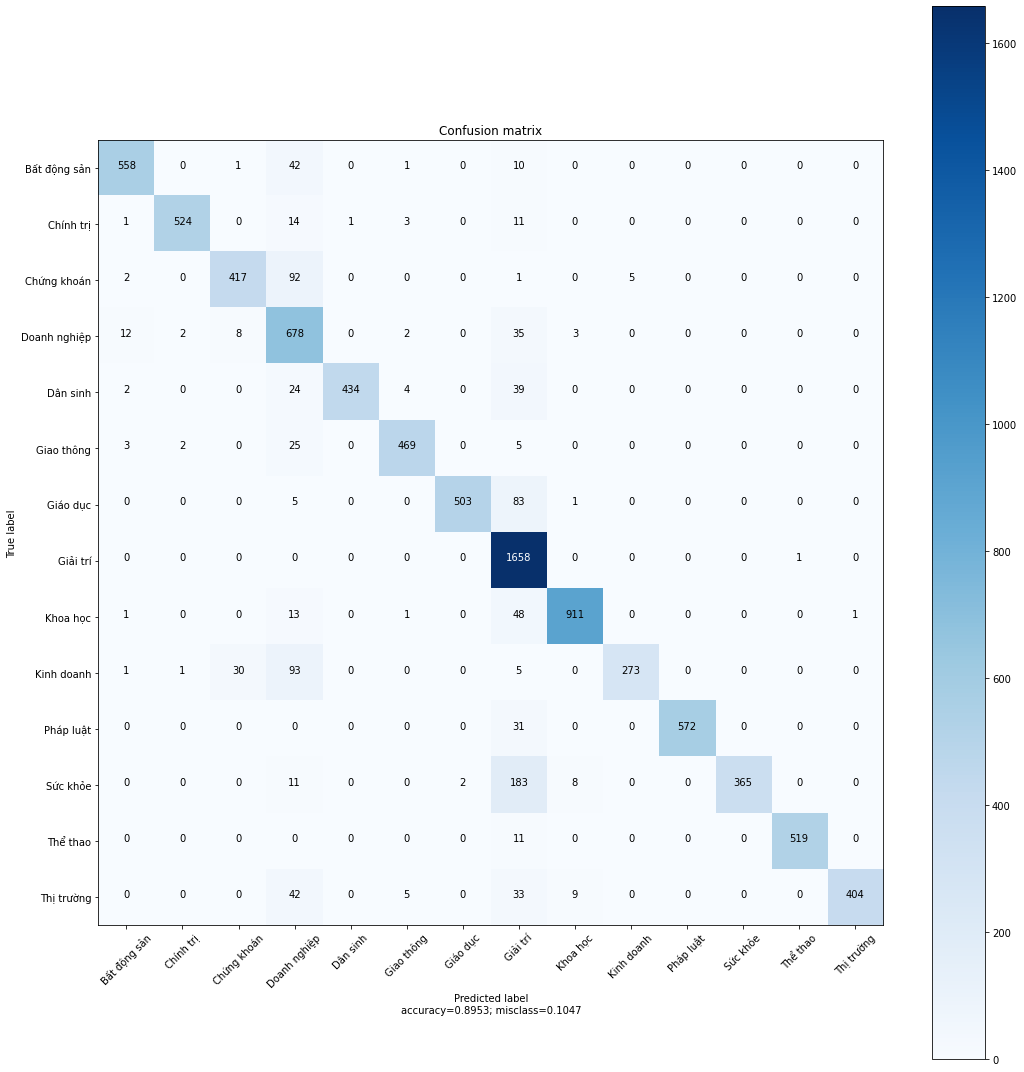

In [15]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('int')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)




    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.0f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()




plot_confusion_matrix(cm,sum_label)


In [16]:
import numpy as np

def cm2pr_binary(cm):
  p =cm[0, 0]/ np.sum(cm[:, 0])
  r = cm[0, 0]/np.sum(cm[0])
  return p, r

p,r = cm2pr_binary(cm)
print(p, r)


0.9620689655172414 0.9117647058823529
